In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/student_records.csv')

In [3]:
df

,Name,OverallGrade,Obedient,ResearchScore,ProjectScore,Recommend
0,Henry,A,Y,90,85,Yes
1,John,C,N,85,51,Yes
2,David,F,N,10,17,No
3,Holmes,B,Y,75,71,No
4,Marvin,E,N,20,30,No
5,Simon,A,Y,92,79,Yes
6,Robert,B,Y,60,59,No
7,Trent,C,Y,75,33,No


In [15]:
from sklearn.cross_validation import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.33, random_state=42)

In [4]:
feature_names = ['OverallGrade', 'Obedient', 'ResearchScore',
'ProjectScore']
training_features = df[feature_names]

In [5]:
outcome_name = ['Recommend']
outcome_labels = df[outcome_name]

In [6]:
numeric_feature_names = ['ResearchScore', 'ProjectScore']
categoricial_feature_names = ['OverallGrade', 'Obedient']

In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(training_features[numeric_feature_names])
training_features[numeric_feature_names] = ss.transform(training_features[numeric_feature_names])

/Users/wunlung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/wunlung/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [9]:
training_features

,OverallGrade,Obedient,ResearchScore,ProjectScore
0,A,Y,0.899583,1.376650
1,C,N,0.730648,-0.091777
2,F,N,-1.803390,-1.560203
3,B,Y,0.392776,0.772004
4,E,N,-1.465519,-0.998746
5,A,Y,0.967158,1.117516
6,B,Y,-0.114032,0.253735
7,C,Y,0.392776,-0.869179


In [10]:
training_features = pd.get_dummies(training_features,
columns=categoricial_feature_names)

In [11]:
training_features

,ResearchScore,ProjectScore,OverallGrade_A,OverallGrade_B,OverallGrade_C,OverallGrade_E,OverallGrade_F,Obedient_N,Obedient_Y
0,0.899583,1.376650,1,0,0,0,0,0,1
1,0.730648,-0.091777,0,0,1,0,0,1,0
2,-1.803390,-1.560203,0,0,0,0,1,1,0
3,0.392776,0.772004,0,1,0,0,0,0,1
4,-1.465519,-0.998746,0,0,0,1,0,1,0
5,0.967158,1.117516,1,0,0,0,0,0,1
6,-0.114032,0.253735,0,1,0,0,0,0,1
7,0.392776,-0.869179,0,0,1,0,0,0,1


In [12]:
categorical_engineered_features = list(set(training_features.columns) -
set(numeric_feature_names))

In [13]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# fit the model
lr = LogisticRegression()
model = lr.fit(training_features,
np.array(outcome_labels['Recommend']))
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
pred_labels = model.predict(training_features)
actual_labels = np.array(outcome_labels['Recommend'])

# evaluate model performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print('Accuracy:', float(accuracy_score(actual_labels,
pred_labels))*100, '%')
print('Classification Stats:')
print(classification_report(actual_labels, pred_labels))

Accuracy: 100.0 %
Classification Stats:
             precision    recall  f1-score   support

         No       1.00      1.00      1.00         5
        Yes       1.00      1.00      1.00         3

avg / total       1.00      1.00      1.00         8



In [19]:
import numpy as np
import sklearn as sk

In [23]:
x = np.array([1,2,2,3])
y = np.array([1,2,3,6])

In [21]:
lr = sk.linear_model.LinearRegression()

In [25]:
lr.fit(x.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
lr.intercept_

-1.9999999999999982

In [26]:
lr.coef_

array([ 2.5])

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
mean_squared_error(x,y)

2.5

In [31]:
 r2_score(x,y)

-4.0

In [35]:
x_test = np.array([1,2,3])
y_test = lr.predict(x_test.reshape(-1,1))

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

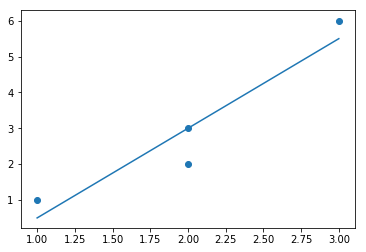

In [36]:
plt.scatter(x,y)
plt.plot(x_test,y_test)

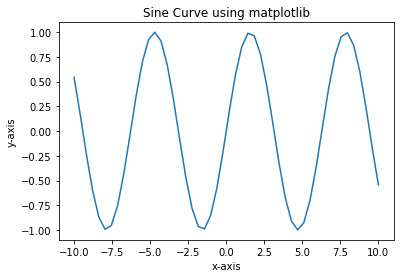

In [39]:
x = np.linspace(-10,10,50)
y = np.sin(x)

plt.plot(x,y)
plt.title('Sine Curve using matplotlib')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

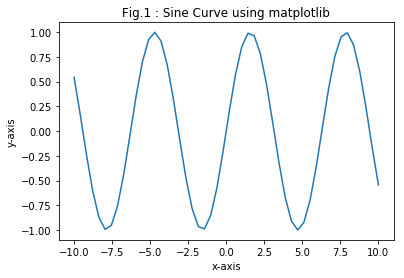

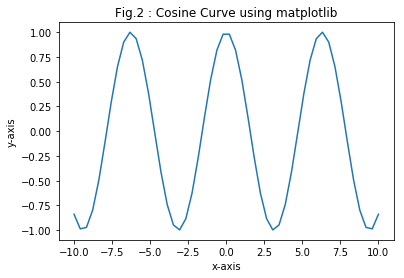

In [41]:
plt.figure(1)
y = np.sin(x)
plt.plot(x,y)
plt.title('Fig.1 : Sine Curve using matplotlib')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.figure(2)
y = np.cos(x)
plt.plot(x,y)
plt.title('Fig.2 : Cosine Curve using matplotlib')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

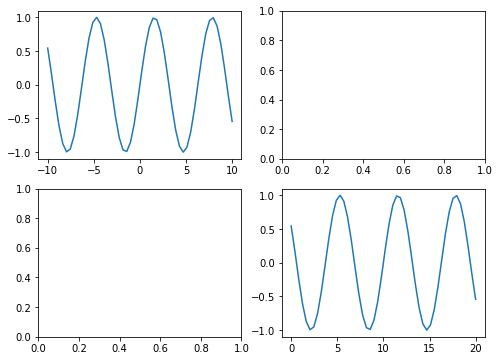

In [42]:
y = np.sin(x)
figure_obj = plt.figure(figsize=(8,6))
ax1 = figure_obj.add_subplot(2,2,1)
ax1.plot(x,y)

ax2 = figure_obj.add_subplot(2,2,2)
ax3 = figure_obj.add_subplot(2,2,3)

ax4 = figure_obj.add_subplot(2,2,4)
ax4.plot(x+10,y)

plt.show()

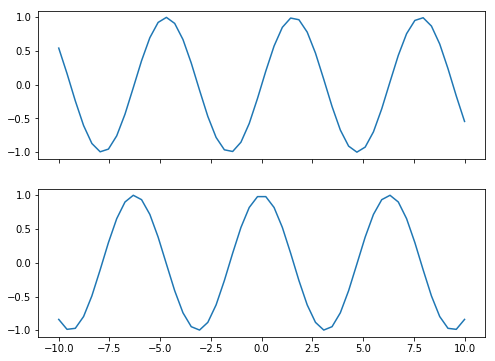

In [48]:
fig, ax_list = plt.subplots(2,1, sharex=True, figsize=(8,6))
y = np.sin(x)
ax_list[0].plot(x, y)

y = np.cos(x)
ax_list[1].plot(x,y)
plt.show()

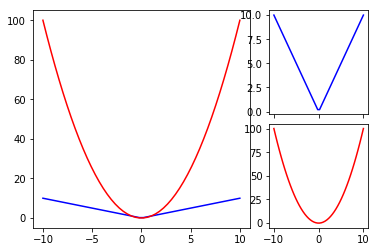

In [51]:
y = np.abs(x)
z = x**2

plt.subplot2grid((4,3), (0,0), rowspan=4, colspan=2)
plt.plot(x,y,'b',x,z,'r')
ax2 = plt.subplot2grid((4,3), (0,2), rowspan=2)
plt.plot(x,y,'b')
plt.setp(ax2.get_xticklabels(), visible=False)
plt.subplot2grid((4,3), (2, 2), rowspan=2)
plt.plot(x, z,'r')

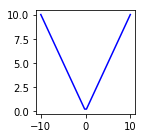